In [2]:
# Using the inbuilt csv library rather than pandas to parse the csv data
import csv

# Creating a list called values that will store all the x- and y-values of the csv file for better handling
values = []

# Reading the csv file using csv library combined with standard python file reading operations
with open('data.csv', 'r') as file:
    my_reader = csv.reader(file, delimiter=',')
    for row in my_reader:
        if len(row) == 2:
            values.append((float(row[0]), float(row[1])))

# Creating different lists for X and Y columns
X = []
Y = []
for pair in values:
    X.append(pair[0])
    Y.append(pair[1])

In [4]:
assert len(X) == len(Y)
n = len(X)

# Calculating necessary summations
sum_X = sum_Y = sum_X2 = sum_Y2 = sum_XY = 0
for i in range(n):
    x = X[i]
    y = Y[i]
    sum_X += x
    sum_Y += y
    sum_X2 += (x * x)
    sum_Y2 += (y * y)
    sum_XY += (x * y)

# Calculating the coefficients of equation of linear regression using this summation
m = ((n * sum_XY) - (sum_X * sum_Y)) / ((n * sum_X2) - (sum_X * sum_X))
c = (sum_Y - (m * sum_X)) / n

# Using the calculated m, c to find the predicted value by the linear regression model
Y_pred = [None] * n
for i in range(n):
    Y_pred[i] = m * X[i] + c

# Displaying some outputs
for i in range(5):
    print(f"X: {X[i]}, Y: {Y[i]}, Y_pred: {Y_pred[i]}")

X: 32.50234526945303, Y: 31.70700584656992, Y_pred: 50.9731306789007
X: 53.42680403327502, Y: 68.77759598163891, Y_pred: 78.64428408254447
X: 61.53035802563644, Y: 62.5623822979458, Y_pred: 89.36067527661639
X: 47.4756396347861, Y: 71.54663223356778, Y_pred: 70.7742796604654
X: 59.81320786951232, Y: 87.23092513368739, Y_pred: 87.08986263942862


In [6]:
# Defining a function mean_squared_error to find out for the given dataset
def mean_squared_error (Y_true, Y_pred):
    squared_error_sum = 0
    for i in range(len(Y_true)):
        squared_error_sum += ((Y_true[i] - Y_pred[i]) * (Y_true[i] - Y_pred[i]))
    mse = squared_error_sum / len(Y_true)
    return mse

# Calling the defined function
print("The mean squared error of linear regression model on the given dataset is:")
print(mean_squared_error(Y, Y_pred))

The mean squared error of linear regression model on the given dataset is:
110.25738346621316


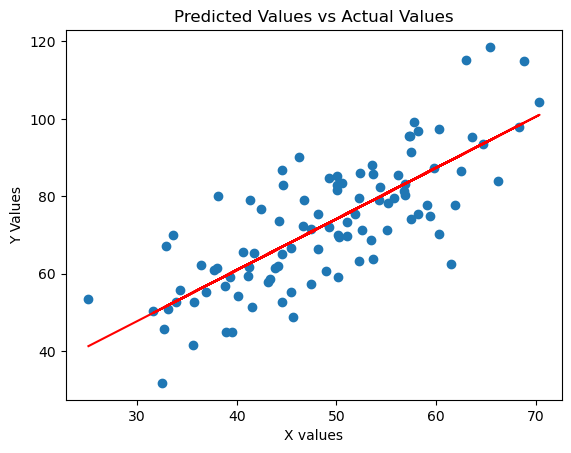

In [8]:
# Importing the library matplotlib to be able to plot the actual and predicted values
import matplotlib.pyplot as plt

# Plotting the actual values as scatter plot and predicted values as a straight line
plt.scatter(X, Y)
plt.plot(X, Y_pred, color = 'red')

# Adding labels to the plot
plt.xlabel('X values')
plt.ylabel('Y Values')
plt.title('Predicted Values vs Actual Values')

plt.show()